# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in the suburbs of Boston. This dataset was originally taken from the StatLib library, which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 

The machine learning community has developed awareness about fairness issues in the past couple of years with popular benchmarking datasets. The Boston Housing data has been phased out of many libraries (including scikit-learn). While this dataset will be removed in a future version of this mini-project, we ask students working through this exercise to pay close attention to how systemic racism can occur in data and sometimes be hard to spot.

We recommend that all students read this [excellent article](https://fairlearn.org/main/user_guide/datasets/boston_housing_data.html), which walks through the origin of the dataset and its flaws 
while discussing with their mentor the techniques suggested to avoid the disastrous consequences that might occur if not aware of the inherent racial bias in this dataset.



## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [3]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [5]:
data.shape

(506, 13)

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [9]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

bos.columns = column_names

# Access the data with column names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [10]:
target.shape

(506,)

In [11]:
target_df = pd.DataFrame(target)
target_df.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [12]:
bos['PRICE'] = target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [13]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

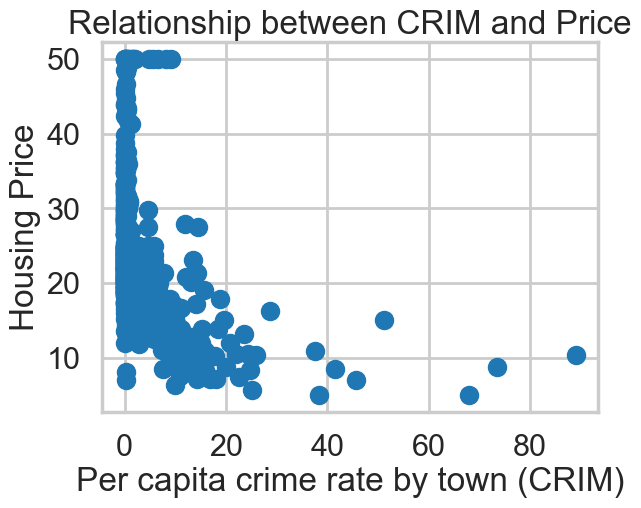

In [14]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

#### Describe relationship
We see a negative exponential relationship, where as CRIM increases, the PRICE initially decreases rapidly, possibly following a negative exponential trend, before reaching a point where it remains relatively constant.Some outliers are also evident, for exemple when Housing Price is at $50k.

Text(0.5, 1.0, 'Relationship between RM and Price')

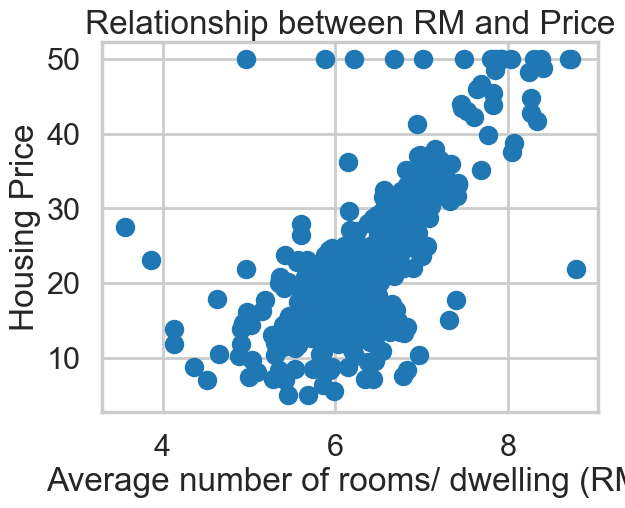

In [17]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms/ dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

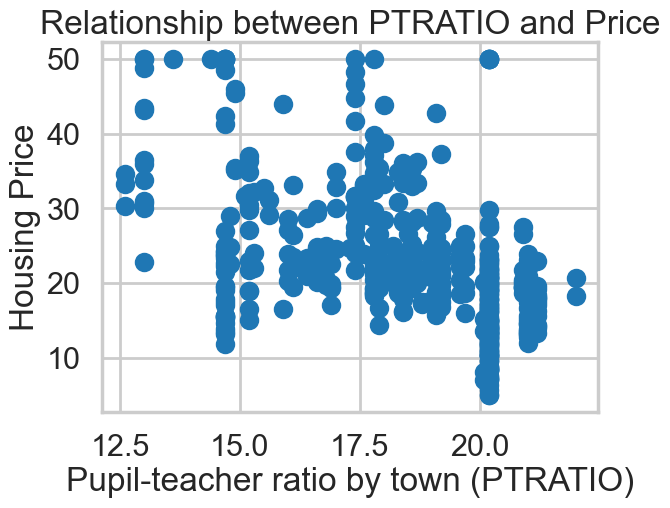

In [16]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

#### Tell a story about what you see.

Relationship between RM and PRICE:

The scatter plot between the average number of rooms per dwelling (RM) and the median value of owner-occupied homes in $1000s (PRICE) from the Boston Housing dataset shows a positive linear relationship. As the number of rooms increases, there is a general trend of higher home prices. This suggests that larger homes with more rooms tend to have higher values.

Relationship between PTRATIO and PRICE:

The scatter plot between the pupil-teacher ratio by town (PTRATIO) and the median value of owner-occupied homes in $1000s (PRICE) from the Boston Housing dataset does not exhibit a clear linear relationship. There appears to be a wide range of home prices across different pupil-teacher ratios. However, there are some clusters of data points indicating specific PTRATIO values where the median home prices are relatively higher or lower.

Overall, from these scatter plots, we can infer that the number of rooms (RM) in a dwelling has a significant impact on home prices (PRICE) in the Boston Housing dataset. On the other hand, the pupil-teacher ratio (PTRATIO) alone may not be a strong determinant of home prices, as other factors likely influence the value of owner-occupied homes. 

## What are some other numeric variables of interest? Why do you think they are interesting?
Some other variables of interest could be LSTAT and NOX. LSTAT is the percentage of population of lower socioeconomic status. It is expected a negative relationship between LSTAT and PRICE, in other words, as the percentage of lower socieconomic status increases the Housing Price decreases.NOX measures the nitric oxides concentration in parts per 10 million. It could be intereesting to explore the relationship between air pollution levels and house prices, since areas with lower NOX values might be considered more desirable due to better air quality, potentially leading to higher property values.

## Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.

Text(0.5, 1.0, 'Relationship between LSTAT and Price')

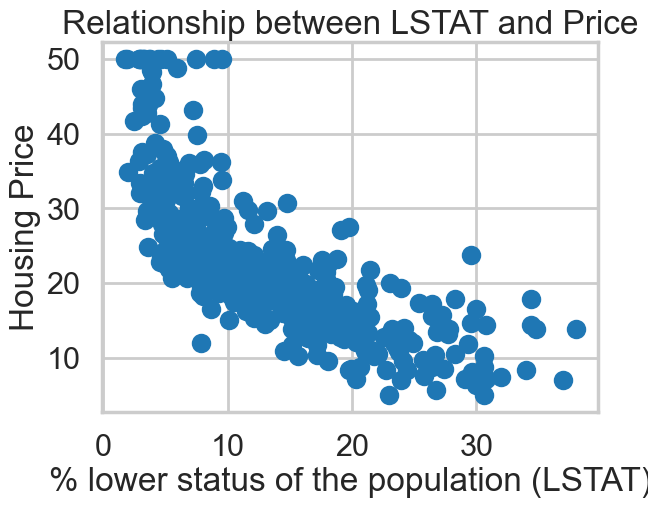

In [47]:
# your turn: create some other scatter plots
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

Relationship between LSTAT and PRICE:

The scatterplot depicting the relationship between the percentage of the lower status population (LSTAT) and house prices (PRICE) reveals an interesting trend. As the percentage of lower status individuals increases, there is a clear downward trend in house prices. Areas with a higher proportion of economically disadvantaged residents tend to have lower property values. This association may be indicative of various socio-economic factors such as limited resources, higher crime rates, and inadequate infrastructure.

Text(0.5, 1.0, 'Relationship between NOX and Price')

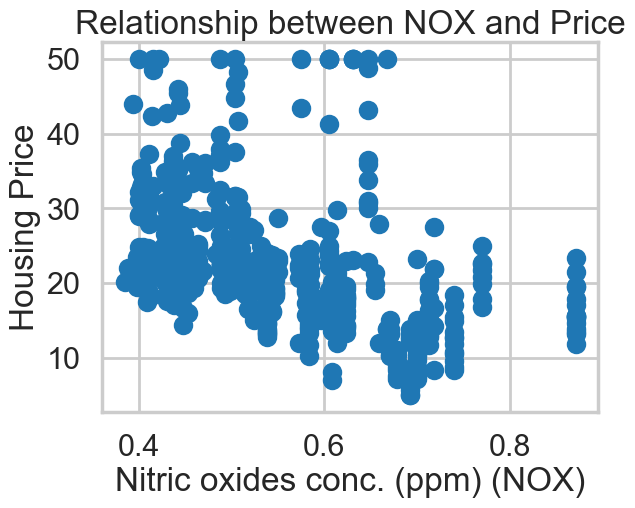

In [19]:
# your turn: create some other scatter plots
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("Nitric oxides conc. (ppm) (NOX)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")

Relationship between NOX and PRICE:

In the scatterplot examining the relationship between nitric oxides concentration (NOX) and house prices (PRICE), reveals an interesting pattern where there seems to be a negative correlation between NOX and PRICE. As the NOX levels increase, there is a general downward trend in house prices. This indicates that areas with higher concentrations of nitric oxides tend to have lower property values. The negative relationship between NOX and PRICE suggests that air pollution plays a significant role in the desirability and pricing of residential properties. Also, we may observe some outliers in the plot where certain houses exhibit unusually high or low nitric oxide concentrations compared to their corresponding prices. These outliers may represent unique cases where other factors, such as location, property size, or specific circumstances, influence the price independently of the nitric oxide concentration.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<Axes: xlabel='RM', ylabel='PRICE'>

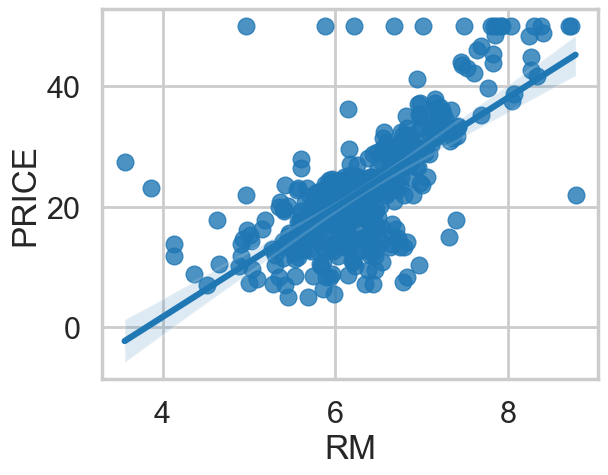

In [20]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


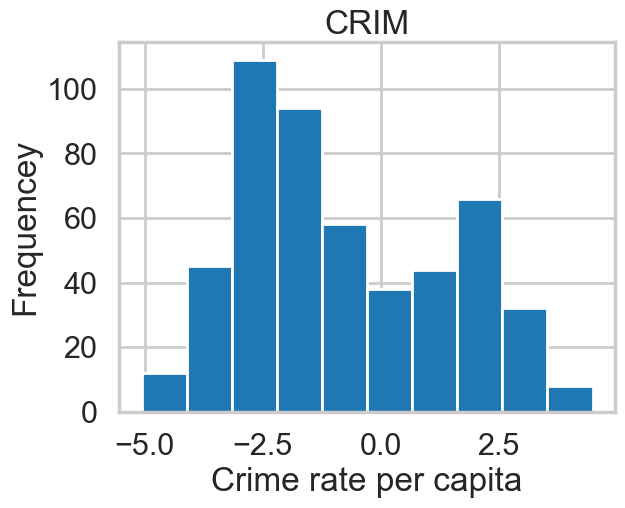

In [21]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

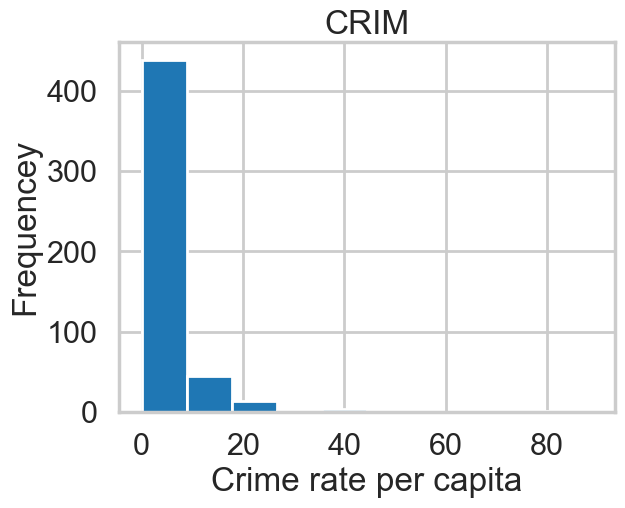

In [23]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

## In the above histogram, we took the logarithm of the crime rate per capita. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

Taking the logarithm of the crime rate per capita in the histogram addresses skewed or highly skewed distributions. When data is highly skewed, with a few extremely high values, it can distort the visualization and make it difficult to identify patterns or interpret the data accurately.

After applying the log transformation to the CRIM variable, we can observe a bimodal distribution in the histogram. This indicates that there are two distinct groups or populations with different levels of crime rates. The logarithmic transformation helps reveal this bimodality by reducing the influence of extreme values and emphasizing the differences between the two modes.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [24]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           2.49e-74
Time:                        21:15:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

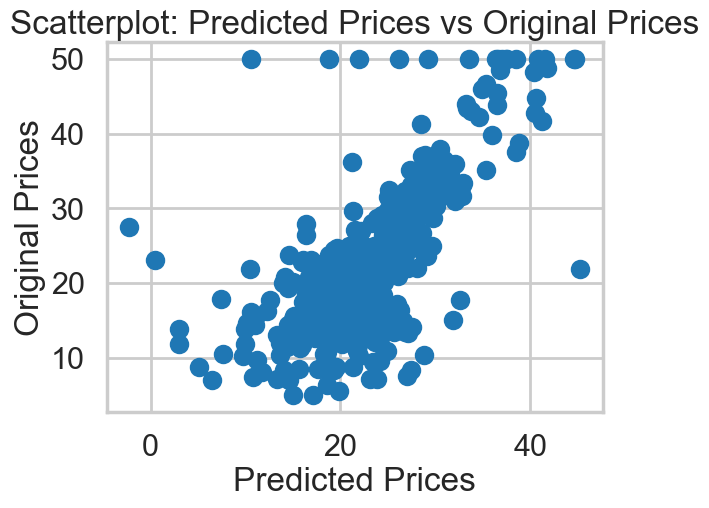

In [26]:
# your turn

# Scatterplot between predicted prices and original prices
plt.scatter(m.fittedvalues, bos['PRICE'])
plt.xlabel('Predicted Prices')
plt.ylabel('Original Prices')
plt.title('Scatterplot: Predicted Prices vs Original Prices')
plt.show()

#### Exercise: How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.

If our model had a high R Square, all the points would be close to a diagonal line. However, since our R-square is low(0.484) we can observe the points are more dispersed, away from this diagonal line.

Furthermore, we can identify three subsections of our model's performance. 

The first one is where Original prices have values between 0 and 30. Here the model seems to do well for some points, but some values seem to be random.

The second one is when the Original prices are between 30 and 50, where the points seems to be close to the diagonal line, so the model seems to be doing relatively well.  

The third zone is for Originals equal to 50.  Within this zone the model underestimated the Original prices.

### Fitting Linear Regression using `sklearn`


In [27]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [62]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [28]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [30]:
# your turn
# Create the LinearRegression model without intercept
lm_without_intercept = LinearRegression(fit_intercept=False)

# Use all 13 predictors to fit linear regression model
lm_without_intercept.fit(X, bos.PRICE)

LinearRegression(fit_intercept=False)

#### Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not?

Removing the intercept term assumes that when all predictor variables are zero, the response variable is also zero. This might be appropriate in certain scenarios where the nature of the data suggests that an intercept is not meaningful or when there is a theoretical justification for the intercept being zero.

Including an intercept allows for the model to have a baseline prediction when all predictor variables are zero. In the context of housing price prediction, this baseline represents the estimated price of a house with no specific features.

Thus, I would recommend to have an intercept term as it is can serve as a reference point to predict housing prices. Housing prices in real-world scenarios are rarely zero, and removing the intercept would force the model to pass through the origin (0,0), which may not accurately reflect the housing market dynamics. Including the intercept helps capture the non-zero average price level observed in the dataset.

#### Exercise:  One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

No, it is not enough for the residuals to be normally distributed to satisfy the assumption of independent and identically distributed (i.i.d.) residuals in a linear model. While normal distribution is a part of the assumption, it is not the sole requirement. The assumption of i.i.d. residuals means that the residuals should be independent of each other and have the same distribution across all levels of the predictor variables. Normality of residuals is related to the assumption of the error term being normally distributed, which is important for certain statistical inference procedures. However, to satisfy the i.i.d. assumption, both independence and identical distribution of residuals need to be met. This means that the residuals should not exhibit any systematic patterns or dependencies, in addition to having the same distribution. 


#### True or false. To use linear regression,  𝑌 must be normally distributed. Explain your answer.

False, to use linear regression, the dependent variable Y does not need to be normally distributed. The assumption of normality in linear regression relates to the errors or residuals (the differences between the observed Y values and the predicted values from the regression model), not the dependent variable itself.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [31]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [32]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [33]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [34]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

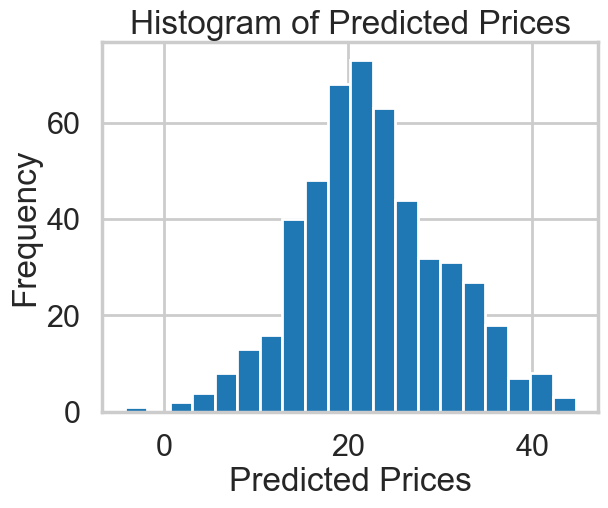

In [35]:
# your turn
# Get all the predicted prices
predicted_prices = lm.predict(X)

# Plot the histogram
plt.hist(predicted_prices, bins=20)
plt.xlabel('Predicted Prices')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Prices')
plt.show()

#### Exercise:  Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

Upon examining the histogram of the predicted prices, we observe a roughly bell-shaped distribution, indicating a reasonably normal distribution. The center of the distribution appears to be around 20,000 USD, as the majority of the predicted prices fall within this range. The spread of the distribution spans from approximately 0 to 45,000 USD, with a gradual decrease in frequency as the prices increase.

In terms of outliers, we can notice a few data points that seem to be located at the extreme ends of the distribution. These outliers are indicated by the small number of predicted prices that exceed 40,000 USD. 
Or, when there shouldn't be any prices bellow 0 USD. There could be several reasons for these outliers, such as unusual or exceptional features of certain properties that are not adequately captured by the predictors in our model. These outliers may represent unique cases that deviate from the general trend.

It might be necessary to investigate the reasons behind these outliers and determine if they are true data points or erroneous entries. Additionally, if the outliers are determined to be influential, alternative modeling approaches or data preprocessing techniques, such as outlier removal or robust regression, may be worth exploring to improve the model's accuracy and reliability.

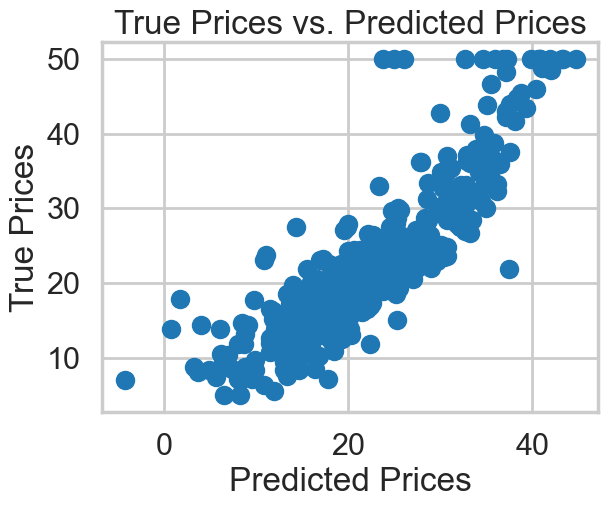

In [36]:
# True prices
true_prices = bos.PRICE

# Predicted prices
predicted_prices = lm.predict(X)

# Plotting
plt.scatter( predicted_prices, true_prices)
plt.xlabel('Predicted Prices')
plt.ylabel('True Prices')
plt.title('True Prices vs. Predicted Prices')
plt.show()

#### Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).

As we can see from the plot above agrees with the previous scatterplot we did with 'statsmodels'. Likewise, we can identify the same three subsections of our model's performance.

#### Exercise: We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?

Scikit-learn follows a consistent API across different models, making it easy to switch between models and apply common functions like fit(), predict(), and score(). Statsmodels, on the other hand, provides a syntax similar to statistical software like R, with an emphasis on statistical model estimation, diagnostics, and interpretation.

Scikit-learn provides a comprehensive set of machine learning algorithms, making it suitable for a variety of modeling tasks beyond linear regression. Scikit-learn offers a wide range of tools for feature selection, feature scaling, and data preprocessing. It provides convenient functions for handling missing values, feature extraction, and transformation. 

Statsmodels, on the other hand, focuses more on the statistical aspects of modeling and may require additional steps or custom implementations for certain preprocessing tasks. Statsmodels provides a wide range of statistical tests and analysis tools, making it suitable for in-depth statistical modeling and hypothesis testing. It offers detailed statistical summaries, including p-values, t-statistics, and confidence intervals, which can aid in interpreting the model and assessing the significance of predictors.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [37]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [38]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

#### Exercise: Fit a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.

In [39]:
# Fit the linear regression model
model = ols('PRICE ~ PTRATIO',bos).fit()
intercept = model.params[0]
coefficient = model.params[1]

print("Intercept:", intercept)
print("Coefficient:", coefficient)

Intercept: 62.344627474832656
Coefficient: -2.1571752960609656


#### Exercise: Interpret the intercept and the coefficients.

The intercept of 62.345 represents the estimated mean housing price when the pupil-teacher ratio is zero. However, this value does not have a practical interpretation since a pupil-teacher ratio of zero is not meaningful in this context.

The coefficient of -2.157 indicates that, on average, for each unit increase in the pupil-teacher ratio, the housing price is expected to decrease by approximately $2,157. This suggests a negative relationship between the pupil-teacher ratio and housing prices. A higher pupil-teacher ratio is associated with lower housing prices, indicating that areas with a higher pupil-teacher ratio tend to have more affordable housing.

In [40]:
r_squared = model.rsquared
print("R-squared:", r_squared)

R-squared: 0.257847318009223


#### Calculate (or extract) the  𝑅-squared   value. What does it tell you?

R-squared value equal to 0.258, shows our linear regression model can only explain 25.8% of the variance in the response variable  𝑌. In other words, the pupil-teacher ratio alone explains about 25.8% of the variation in housing prices. It suggests that the pupil-teacher ratio has some level of influence on housing prices, but there are other factors not accounted for in the model that also contribute to the variability in prices.

#### Exercise: Compute the  𝐹 -statistic. What does it tell you?

In [43]:
fvalue = model.fvalue

print("F-statistic:", fvalue)

F-statistic: 175.1055428756955



  The F-statistic is used to test the overall significance of the linear regression model. In this case, the F-statistic tells us whether there is a significant relationship between the predictor variable ('PTRATIO') and the response variable (housing prices).
  
  Based on the magnitude of the F-statistic, 175.106, it suggests that there is a significant relationship between 'PTRATIO' and housing prices in this model.

#### Take a close look at the  𝐹 -statistic and the  𝑡 -statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.

In [44]:
tvalue = model.tvalues

print("T-statistic:\n", tvalue)

T-statistic:
 Intercept    20.581406
PTRATIO     -13.232745
dtype: float64


The square of the t-statistic for the regression coefficient is equal to the F-statistic:

t^2 = (-13.232745)^2 = 175.105542 = F

This relationship holds true because in a simple linear regression model, we have only one predictor variable, so the F-statistic is essentially testing the significance of that single predictor variable, PTRATION in this case. The t-statistic for the regression coefficient is specifically testing the significance of that predictor variable as well. Therefore, the squared value of the t-statistic is equal to the F-statistic.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [45]:
# your turn
model = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()

In [46]:
r_squared = model.rsquared
print("R-squared:", r_squared)

R-squared: 0.5943412940723473


In [48]:
# Get the F-statistic, t-statistic and p-value
fvalue = model.fvalue

print("F-statistic:", fvalue)

F-statistic: 245.1644903006464


#### Exercise: Compute or extract the  𝐹 -statistic. What does it tell you about the model?
#### Exercise: Compute or extract the  𝑅^2  statistic. What does it tell you about the model?

The F-statistic for the model is 245.2. The obtained F-statistic is quite large, which suggests that the model is statistically significant, meaning that at least one of the predictors in the model has a significant relationship with the dependent variable (PRICE).

The R-squared statistic for the model is 0.594, which means that approximately 59.4% of the variability in the dependent variable (PRICE) is explained by the predictors (CRIM, RM, PTRATIO) included in the model. A higher R-squared value indicates a better fit of the model to the data. In this case, an R-squared of 0.594 suggests that the model captures a moderate amount of the variability in house prices using the given predictors.

#### Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.

In [108]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           6.15e-98
Time:                        13:57:18   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

CRIM: The coefficient for CRIM is -0.2050. This means that for every unit increase in the per capita crime rate, the predicted house price decreases by approximately $205. This variable is statistically significant as indicated by the very low p-value (p < 0.001), suggesting that it has a significant impact on house prices.

RM: The coefficient for RM is 7.3804. This means that, on average, each additional room in a dwelling is associated with an increase of approximately $7,380 in the predicted house price. The coefficient is positive, indicating that a higher number of rooms is associated with higher house prices. This variable is highly significant (p < 0.001), suggesting it is an important predictor of house prices.

PTRATIO: The coefficient for PTRATIO is -1.0695. This means that for every unit increase in the pupil-teacher ratio, the predicted house price decreases by approximately $1,070. The negative coefficient suggests that a higher pupil-teacher ratio is associated with lower house prices. This variable is also highly significant (p < 0.001), indicating its importance in predicting house prices.

In summary, based on the given model, lower crime rates, more rooms per dwelling, and lower pupil-teacher ratios are associated with higher house prices. These variables provide insights into the factors influencing housing values and can be considered significant predictors of house prices.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

#### Compute the  𝐹 -test comparing the two models as well as the AIC. Which model is better?

In [49]:
model_1 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
model_2 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT',bos).fit()

In [50]:
ssr_1 = model_1.ssr
ssr_2 = model_2.ssr

n = len(bos)
k1 = model_1.df_model
k2 = model_2.df_model

In [53]:
f_statistic = ((ssr_1 - ssr_2) / (k2 - k1)) / (ssr_2 / (n - k2))
aic_1 = model_1.aic
aic_2 = model_2.aic

print("F-statistic: ", f_statistic)
print("Model 1 - AIC:", aic_1)
print("Model 2 - AIC:", aic_2)

F-statistic:  137.35880000319204
Model 1 - AIC: 3231.9451235449956
Model 2 - AIC: 3111.5610897408874


F-statistic is reasonably large, 137.35880000319204, suggesting that the model is statistically significant. In other words, the inclusion of the additional variable (LSTAT) in Model 2 provides a statistically significant improvement over Model 1.

When comparing the AIC values of the two models, a lower AIC indicates a better fit of the model to the data. In this case, Model 2 has an AIC of 3111.5610897408874, which is lower than the AIC of Model 1, which is 3231.9451235449956. Therefore, based on the AIC criterion, Model 2 is considered a better-fitting model.

Overall, the results suggest that Model 2, which includes the additional variable LSTAT, is statistically significant and provides a better fit to the data compared to Model 1, which only includes CRIM, RM, and PTRATIO.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

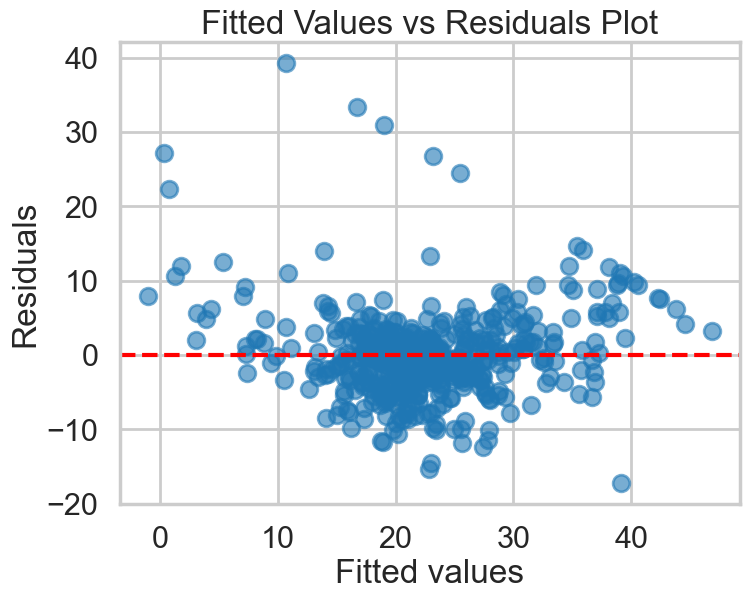

In [54]:
# Your turn.
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Get the predicted (fitted) values
fitted_values = model_1.fittedvalues

# Get the residuals
residuals = model_1.resid

# Fitted values vs residuals plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(fitted_values, residuals, alpha=0.6)
ax.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals Plot')
plt.show()

#### Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

**Linearity**.  The residuals display a slightly curved relationship or exhibit a non-random pattern around zeroas the fitted values change, which suggests a violation of the linearity assumption.

**Normal distribution for errors**.  Residuals are not symmetrically distributed around zero, suggesting a violation of the assumption of normal distribution for errors.

**Independent errors**. If the residuals exhibit a random pattern and do not display any discernible structure, it suggests that the assumption of independent errors does not hold.

**Constant standard deviation**. Variance of the error is not constant across various levels of our dependent variable. We can see a clear pattern of increasing or decreasing spread of the standardized residuals, indicating a violation of the assumption of constant standard deviation.

#### Exercise: Construct a quantile plot of the residuals. What does the plot tell you?

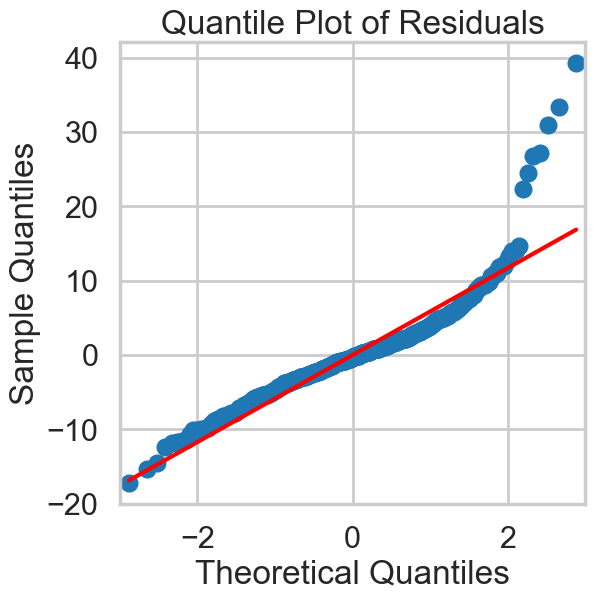

In [128]:
from statsmodels.graphics.gofplots import qqplot

# Quantile plot of residuals
fig, ax = plt.subplots(figsize=(6, 6))
qqplot(model_1.resid, line='s', ax=ax)

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Quantile Plot of Residuals')
plt.show()

This plot shows the error terms are not normally distributed, since the right end of the plot does not lie on the diagonal line. Thus, the assumptions that the errors are normally distributed is violated.

#### Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

We can clearly identify some outliers in the upper left corner of the plot. These outliers might represent measurement errors, or other factors and variables that we are not aware of that might have caused those unusual value.

Measurement errors: Outliers may be due to errors in data collection or recording. These outliers could be caused by typos, miscalculations, or other mistakes during data entry.

Extreme values: Outliers might indicate observations with extreme values in the predictors or target variable. For example, outliers could represent properties with exceptionally high or low crime rates (CRIM), unusually large or small numbers of rooms (RM), or extreme property tax rates (PTRATIO).

##### Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

Advantages of the Fitted vs. Residual plot:

Relationship Assessment: The plot allows us to visually examine the relationship between the fitted values and the corresponding residuals, helping us assess the linearity assumption of the model.
Outlier Detection: It helps identify potential outliers observations by examining points that deviate significantly from the zero residual line.
Constant Standard Deviation: We can assess the constant variance assumption by checking if the spread of points is relatively consistent across the range of fitted values.

Advantages of the Quantile plot:

Normality Assessment: The plot provides a graphical representation of the distribution of the residuals, allowing us to assess the normality assumption of the model. Deviations from the straight line indicate deviations from normality.
Outlier Detection: Extreme deviations from the quantile line can indicate the presence of outliers.

Disadvantages of the Fitted vs. Residual plot:

Limited to Linearity Assessment: While the plot is useful for evaluating linearity and identifying outliers, it doesn't provide direct information about the distributional assumptions of the residuals.

Disadvantages of the Quantile plot:

Limited to Normality Assessment: The plot focuses on assessing the normality assumption and may not provide insights into other assumptions, such as linearity.

#### Exercise: Construct a leverage plot and identify high leverage points in the model.

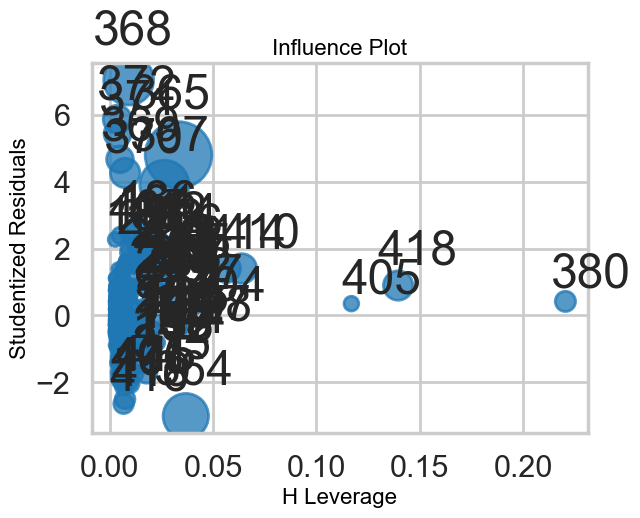

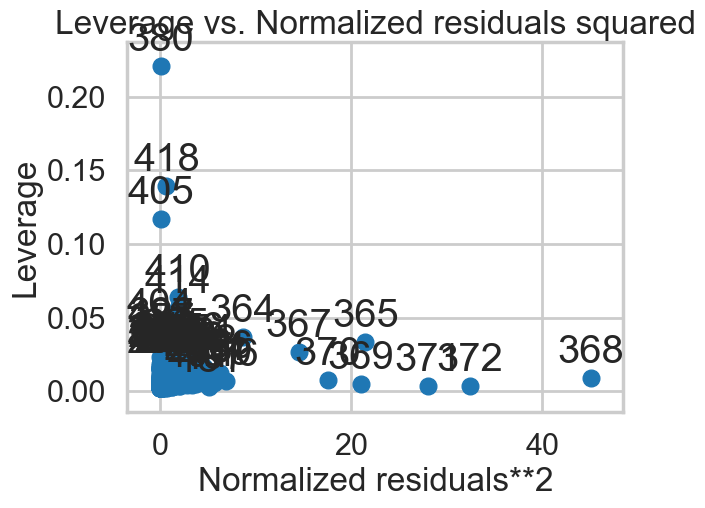

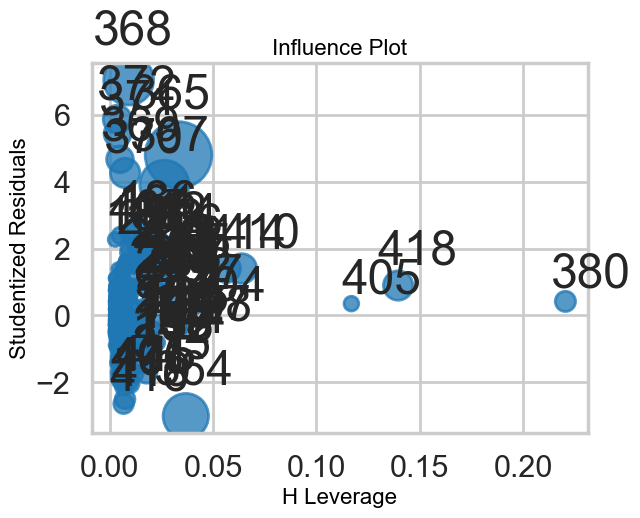

In [55]:
from statsmodels.graphics.regressionplots import *

# Plot leverage vs. standardized residuals
plot_leverage_resid2(model_1)

# Plot influence plot
influence_plot(model_1)

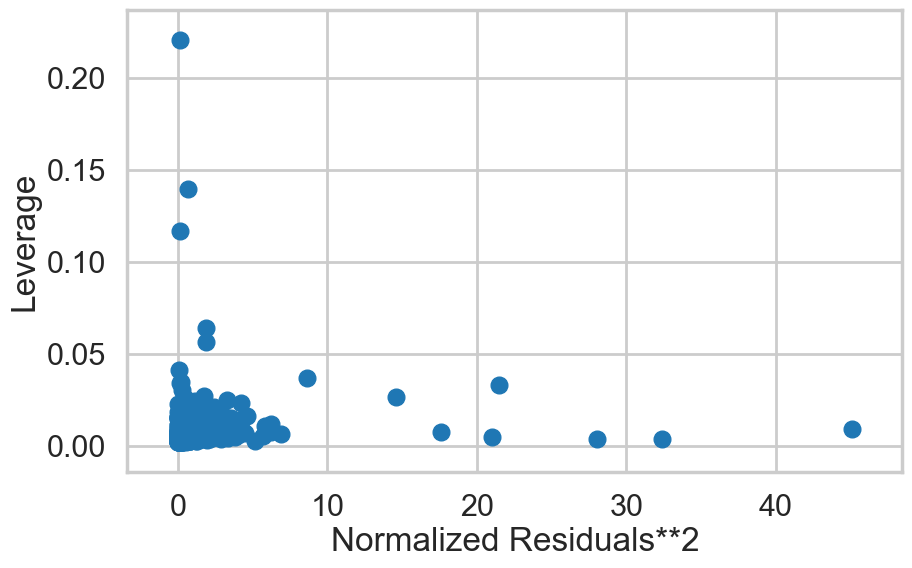

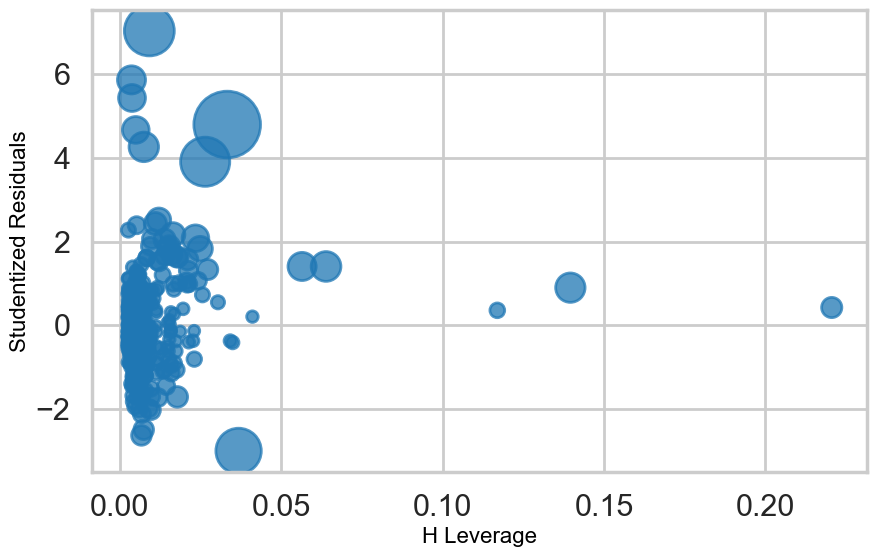

In [57]:
import matplotlib.pyplot as plt
import statsmodels.graphics.regressionplots as smg

# Plot leverage vs. standardized residuals with improved visualization
fig, ax = plt.subplots(figsize=(10, 6))
smg.plot_leverage_resid2(model_1, ax=ax)

# Customize the plot by removing observation numbers
for i, txt in enumerate(ax.get_children()):
    if isinstance(txt, plt.Text):
        txt.set_visible(False)

ax.set_title("Leverage vs. Standardized Residuals")
ax.set_xlabel("Normalized Residuals**2")
ax.set_ylabel("Leverage")

# Plot influence plot with improved visualization
fig, ax = plt.subplots(figsize=(10, 6))
smg.influence_plot(model_1, ax=ax, alpha=0.5, criterion="cooks")

# Customize the plot by removing observation numbers
for i, txt in enumerate(ax.get_children()):
    if isinstance(txt, plt.Text):
        txt.set_visible(False)

ax.set_title("Influence Plot")
ax.set_xlabel("H Leverage")
ax.set_ylabel("Studentized Residuals")

plt.show()

 #### Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.
 
Possible reasons for high leverage points in the Boston housing price model could include:

Outliers in predictor variables: Observations with extremely high or low values for crime rate (CRIM), number of rooms (RM) or pupil-teacher ratio by town (PTRATIO) could exhibit high leverage if they deviate significantly from the majority of the dataset.

Property characteristics: Properties with unusual characteristics, such as being exceptionally large or old, may have high leverage in the model. These properties could have a substantial impact on the estimated coefficients due to their unique features.

Measurement errors: High leverage points can also result from measurement errors in the predictor variables. Inaccuracies in data collection, recording, or preprocessing may lead to extreme values that influence the model's fit.

In [139]:
predictors = ['CRIM', 'RM', 'PTRATIO']

# Identify high leverage points
influence = model_1.get_influence()
hat_values = influence.hat_matrix_diag
high_leverage_points = hat_values > (2 * (len(predictors) + 1)) / len(bos)

# Identify outliers based on standardized residuals
outliers = np.abs(influence.resid_studentized_internal) > 2

# Combine high leverage points and outliers to get observations to remove
remove_indices = high_leverage_points | outliers

# Remove outliers and high leverage points from the dataset
bos_cleaned = bos.loc[~remove_indices]

# Fit the model again with the cleaned dataset
model_2 = ols('PRICE ~ CRIM + RM + PTRATIO', bos_cleaned).fit()

# Compare the results of model_1 and model_2
print(model_1.summary())
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           6.15e-98
Time:                        19:53:28   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

#### Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

Removing the outliers with high leverage increased our model's performance considerably. 

Based on the provided OLS regression results, the initial model had an R-squared value of 0.594, indicating that approximately 59.4% of the variance in the target variable (PRICE) was explained by the predictors (CRIM, RM, and PTRATIO). The F-statistic is 245.2, with a corresponding p-value of 6.15e-98, suggesting that the model is statistically significant.

After removing the outliers and high leverage points, the results improved. The updated model has an R-squared value of 0.733, indicating an improved fit compared to the initial model. The F-statistic also increased to 402.1, with a very low p-value (1.20e-125), further supporting the increased significance of the model. Additionally, the AIC decreased from 3232 to 2437, suggesting a better trade-off between model fit and complexity.

These improvements indicate that removing outliers and high leverage points helped to refine the model's performance, resulting in a better fit to the data.